# 의사결정나무(Decision Tree)
| 데이터를 분류하고 예측하는 결정에 이르기 위해 특정 기준에 따라 O/X 로 답할 수 있는 질문을 이어나가면서 학습하는 알고리즘
* 분류 규칙이 명확하여 해석이 쉬움
* 연속형, 범주형 변수를 모두 사용할 수 있음
* 선형성, 정규성 등의 가정이 필요하지 않아 전처리 과정에 큰 영향을 받지 않음

분리기준(Splitting Criterion) 
1. 분류분석

    * 카이제곱 통계량 p값
    * 지니지수
    * 엔트로피지수
    
2. 회귀분석

    * 분산분석 F통계량 p값
    * 분산의 감소량
    


결정트리 복잡도 제어

| 데이터를 학습 할 때, 모든 데이터가 가가 분할되도록 가지를 치도록 모델링한다면 과적합 문제가 발생할 수 있음

* 과적합 문제를 방지하기 위해 가지치기(Pruning)를 이용하여 트리의 성장을 제한

    ```sklearn``` 에서 지원하는 방식은 사전에 **트리의 최대깊이**, **리프의 최대 개수**, **노드가 분할하기 위한 최소개수** 등을 지정

```
sklearn.tree.DecisionTreeClassifier
(criterion, max_depth, min_samples_split, min_samples_leaf, class_weight)
```
1. 매개변수

* criterion: 노드를 분할할 때 사용할 함수(분리기준)
* max_depth: 트리의 최대 깊이(뻗어나갈 가지 개수)
* min_samples_split: 내부노드를 분할하는 데 필요한 최소 샘플
* min_samples_leaf: 리프노드에 있어야하는 최소 샘플 수
* class_weight: 클래스 가중치

2. 속성

* feature_importances_: 변수중요도


### 신용데이터 예제
* target -> credit.rating(신용등급)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier # 모델
from sklearn.model_selection import train_test_split # 데이터 분할
from sklearn.metrics import * # 성능평가

In [2]:
credit = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/credit_final.csv')
credit.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
credit['credit.rating'].value_counts(normalize=True)

credit.rating
1    0.7
0    0.3
Name: proportion, dtype: float64

In [9]:
# 데이터 분할
x = credit.drop('credit.rating', axis=1)
y = credit['credit.rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=1, stratify=y)
# 학습
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train)
# 예측
pred_tt = clf.predict(x_test)
# 평가
acc = accuracy_score(y_test, pred_tt)
rcll = recall_score(y_test, pred_tt)
prc = precision_score(y_test, pred_tt)
f1 = f1_score(y_test, pred_tt)

print(f'''
      정확도: {acc}%
      재현율: {rcll}
      정밀도: {prc}
      F1: {f1}''')


      정확도: 0.7066666666666667%
      재현율: 0.8761904761904762
      정밀도: 0.7479674796747967
      F1: 0.807017543859649


In [10]:
# classification_report
print(classification_report(y_test, pred_tt))

              precision    recall  f1-score   support

           0       0.52      0.31      0.39        90
           1       0.75      0.88      0.81       210

    accuracy                           0.71       300
   macro avg       0.63      0.59      0.60       300
weighted avg       0.68      0.71      0.68       300



/Users/sai/anaconda3/envs/section4_pj/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


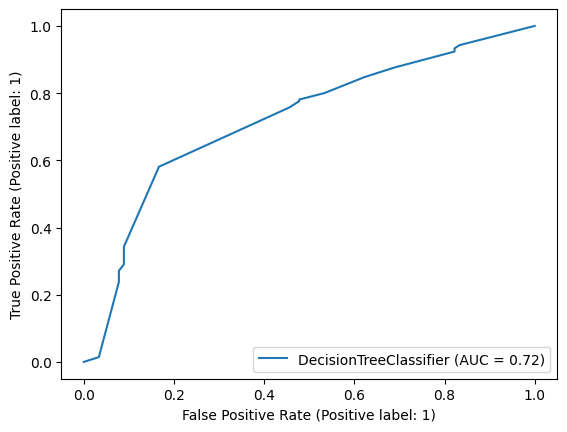

0.7221428571428572


In [11]:
# roc-auc score
plot_roc_curve(clf, x_test, y_test)
plt.show();
print(roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1]))

In [18]:
# 변수 중요도 확인
importances = pd.DataFrame(clf.feature_importances_)
cols = pd.DataFrame(x.columns)
feature_impt = pd.concat([cols, importances], axis=1)
feature_impt.columns = ['feature_name', 'importance']
feature_impt.sort_values('importance', ascending=False, inplace=True)
feature_impt.reset_index(drop=True, inplace=True)



In [23]:
selected_cols = list(feature_impt.iloc[:10, 0])


In [26]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [27]:
# 변수 제거
x_train = x_train[selected_cols]
x_test = x_test[selected_cols]
# 하이퍼 파라미터 튜닝 - 랜덤=>그리드
dt = DecisionTreeClassifier(class_weight='balanced')
param_distributions = {
    'max_depth': np.arange(1, 16),
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(5, 50, 5)
}
random_dt = RandomizedSearchCV(
    dt,
    param_distributions=param_distributions,
    n_iter=30,
    cv=5
)
random_dt.fit(x_train, y_train)
pd.DataFrame(random_dt.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
29,0.001537,0.000028,0.000589,0.000023,8,40,14,"{'min_samples_split': 8, 'min_samples_leaf': 4...",0.671429,0.728571,0.628571,0.707143,0.742857,0.695714,0.041305,1
18,0.001278,0.000023,0.000568,0.000008,4,30,2,"{'min_samples_split': 4, 'min_samples_leaf': 3...",0.657143,0.707143,0.657143,0.714286,0.742857,0.695714,0.033685,1
9,0.001589,0.000071,0.000626,0.000076,14,40,15,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.671429,0.728571,0.628571,0.707143,0.742857,0.695714,0.041305,1
3,0.001572,0.000033,0.000628,0.000055,2,40,10,"{'min_samples_split': 2, 'min_samples_leaf': 4...",0.671429,0.728571,0.628571,0.707143,0.742857,0.695714,0.041305,1
6,0.001595,0.000030,0.000600,0.000025,12,35,14,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.692857,0.728571,0.600000,0.707143,0.742857,0.694286,0.050183,5
14,0.001267,0.000009,0.000566,0.000008,14,15,2,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.664286,0.678571,0.657143,0.714286,0.742857,0.691429,0.032388,6
4,0.001318,0.000055,0.000586,0.000007,14,5,2,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.657143,0.678571,0.657143,0.714286,0.742857,0.690000,0.033685,7
25,0.001280,0.000011,0.000565,0.000008,10,10,2,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.657143,0.678571,0.657143,0.714286,0.742857,0.690000,0.033685,7
1,0.001681,0.000039,0.000711,0.000076,18,45,10,"{'min_samples_split': 18, 'min_samples_leaf': ...",0.671429,0.728571,0.600000,0.707143,0.742857,0.690000,0.051030,7
5,0.001537,0.000023,0.000605,0.000013,8,45,7,"{'min_samples_split': 8, 'min_samples_leaf': 4...",0.671429,0.728571,0.600000,0.707143,0.742857,0.690000,0.051030,7
